# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
# =========================================
# Importing Required Libraries
# =========================================

# ================================
# NumPy
# ================================
# Used for numerical operations and working with arrays
import numpy as np

# ================================
# Pandas
# ================================
# Used for importing datasets and creating feature matrix (X) and target vector (y)
import pandas as pd

# ================================
# Matplotlib
# ================================
# Used for data visualization (mainly the pyplot module)
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
# =========================================
# Importing the Dataset
# =========================================

# Read the CSV file containing Position and Salary data
dataset = pd.read_csv('Position_Salaries.csv')

# ================================
# Prepare Feature Matrix (X)
# ================================
# iloc[:, 1:-1] → take all rows, columns from index 1 to the second-last column
# In our dataset:
#   - Column 0: Position (not used as numeric feature)
#   - Column 1: Level (used as feature)
X = dataset.iloc[:, 1:-1].values

# ================================
# Prepare Dependent Variable Vector (y)
# ================================
# iloc[:, -1] → take all rows, last column
# Column 2: Salary (target value to predict)
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


This is required for StandardScaler to work correctly on the target variable y.

In [ ]:
y = y.reshape(len(y), 1)

In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [ ]:
# ================================
# Feature Scaling
# ================================

# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# ================================
# Create two scaler objects
# ================================
# One for the feature matrix X and one for the target vector y
sc_X = StandardScaler()
sc_y = StandardScaler()

# ================================
# Fit and transform X
# ================================
# Computes the mean and std of X and scales X accordingly
X = sc_X.fit_transform(X)

# ================================
# Fit and transform y
# ================================
# Computes the mean and std of y and scales y accordingly
y = sc_y.fit_transform(y)


In [ ]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [ ]:
# ================================
# Training the SVR model
# ================================

# Import SVR from sklearn.svm
from sklearn.svm import SVR

# ================================
# Create SVR regressor object
# ================================
# kernel='rbf' → using Radial Basis Function for non-linear regression
regressor = SVR(kernel='rbf')

# ================================
# Fit the SVR model on the scaled X and y
# ================================
regressor.fit(X, y)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [ ]:
# sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))
# ================================================
# Predicting a new result using SVR and inverse scaling
# ================================================

# Level we want to predict the salary for
new_level = [[6.5]]  # 2D array because scikit-learn expects (n_samples, n_features)

# ================================
# Step 1: Scale the input value using the same X scaler
# ================================
# SVR model was trained on scaled X values, so we must scale new inputs similarly
scaled_level = sc_X.transform(new_level)

# ================================
# Step 2: Predict the salary (still in scaled units)
# ================================
# The output from SVR is also scaled because y was scaled during training
pred_salary_scaled = regressor.predict(scaled_level)

# ================================
# Step 3: Reshape the predicted value
# ================================
# reshape(-1,1) is required because inverse_transform expects a 2D array (n_samples, n_features)
pred_salary_scaled = pred_salary_scaled.reshape(-1,1)

# ================================
# Step 4: Convert the scaled prediction back to original salary units
# ================================
pred_salary_actual = sc_y.inverse_transform(pred_salary_scaled)

# ================================
# Step 5: Display results
# ================================
print("Scaled prediction (SVR output before inverse scaling):", pred_salary_scaled)
print("Predicted salary (original units):", pred_salary_actual)


Scaled prediction (SVR output before inverse scaling): [[-0.27861589]]
Predicted salary (original units): [[170370.0204065]]


## Visualising the SVR results

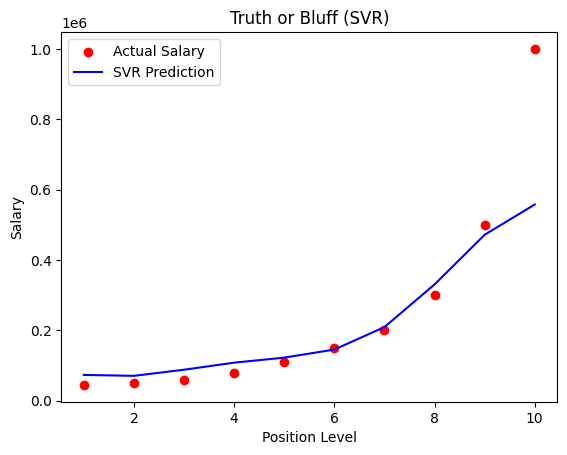

In [ ]:
# ================================================
# Visualising the SVR results (original scale)
# ================================================

# Scatter plot of the actual salaries
# Red points represent the true salaries for each position level
plt.scatter(
    sc_X.inverse_transform(X),    # Convert scaled X back to original scale
    sc_y.inverse_transform(y),    # Convert scaled y back to original scale
    color='red',
    label='Actual Salary'
)

# Plot the SVR predicted salaries
# Blue line represents the predictions from the trained SVR model
plt.plot(
    sc_X.inverse_transform(X),                                   # X back to original scale
    sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), # Predictions back to original scale
    color='blue',
    label='SVR Prediction'
)

# Add title and axis labels
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

# Add legend
plt.legend()

# Display the plot
plt.show()


## Visualising the SVR results (for higher resolution and smoother curve)

/tmp/ipython-input-168623840.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(


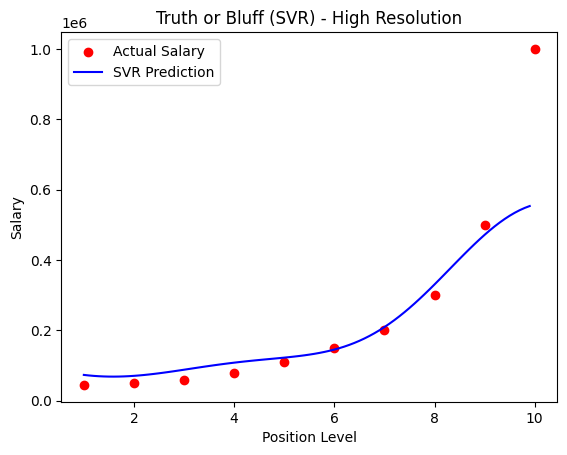

In [ ]:
# ================================================
# Visualising the SVR results (high-resolution and smooth curve)
# ================================================

# Create a grid of X values for high-resolution curve
# np.arange(start, stop, step) → generates values from min to max with step 0.1
X_grid = np.arange(
    min(sc_X.inverse_transform(X)),  # minimum Position level in original scale
    max(sc_X.inverse_transform(X)),  # maximum Position level in original scale
    0.1
)

# Reshape X_grid to 2D array (required by sklearn)
X_grid = X_grid.reshape((len(X_grid), 1))

# Scatter plot of actual salaries
# Red points represent the true salaries
plt.scatter(
    sc_X.inverse_transform(X),   # X back to original scale
    sc_y.inverse_transform(y),   # y back to original scale
    color='red',
    label='Actual Salary'
)

# Plot the SVR predicted salaries for the high-resolution grid
# - Transform the X_grid to scaled space
# - Predict using the trained SVR
# - Reshape to 2D for inverse_transform
plt.plot(
    X_grid,
    sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),
    color='blue',
    label='SVR Prediction'
)

# Add title and axis labels
plt.title('Truth or Bluff (SVR) - High Resolution')
plt.xlabel('Position Level')
plt.ylabel('Salary')

# Add legend
plt.legend()

# Display the plot
plt.show()


##BOUNS QUESTION

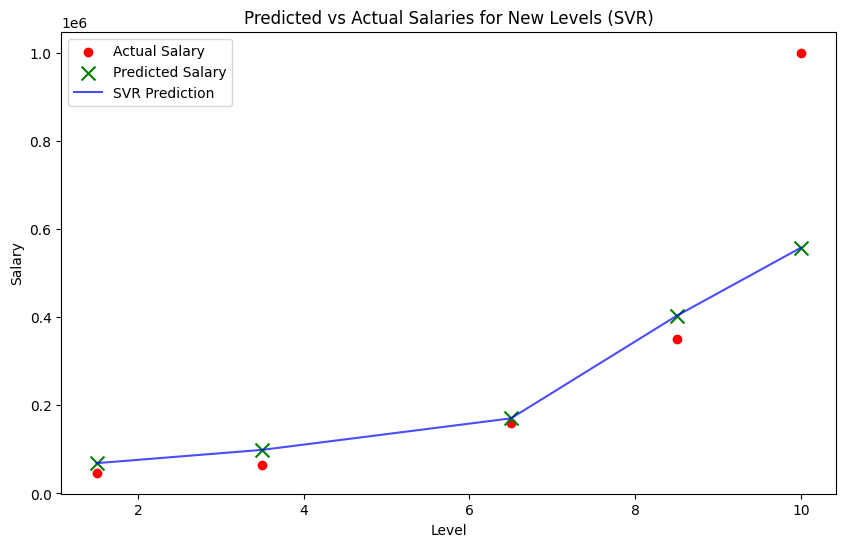

In [ ]:
# ================================================
# SVR Prediction and Visualization for New Levels
# ================================================

# ================================
# New Levels for prediction
# ================================
# These are the new candidate levels for which we want to predict salary
X_new = np.array([1.5, 3.5, 6.5, 8.5, 10])

# ================================
# Reshape X_new to 2D array
# ================================
# Required shape for sklearn: (n_samples, n_features)
X_new = X_new.reshape((len(X_new), 1))

# ================================
# Scale the new levels using the same scaler as the training set
# ================================
X_new_scaled = sc_X.transform(X_new)

# ================================
# Predict salaries for the new levels
# ================================
# Using the trained SVR model
y_new_pred_scaled = regressor.predict(X_new_scaled)

# ================================
# Inverse transform the predicted salaries to original scale
# ================================
y_new_pred = sc_y.inverse_transform(y_new_pred_scaled.reshape(-1,1))

# ================================
# Suppose we have the actual salaries for these new levels
# ================================
y_new_actual = np.array([47000, 65000, 160000, 350000, 1000000])

# ================================
# Visualize Actual vs Predicted Salaries
# ================================
plt.figure(figsize=(10,6))

# Scatter plot for actual salaries
plt.scatter(X_new, y_new_actual, color='red', label='Actual Salary')

# Scatter plot for predicted salaries
plt.scatter(X_new, y_new_pred, color='green', label='Predicted Salary', marker='x', s=100)

# Plot SVR prediction curve
plt.plot(X_new, y_new_pred, color='blue', alpha=0.7, label='SVR Prediction')

# Add title and axis labels
plt.title('Predicted vs Actual Salaries for New Levels (SVR)')
plt.xlabel('Level')
plt.ylabel('Salary')

# Add legend
plt.legend()

# Display the plot
plt.show()
